**Install Required Packages and Import Libraries**

In [26]:
!pip install requests
!pip install plotly
!pip install -U kaleido


import requests
import pandas as pd
import seaborn
import plotly.graph_objs as go
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose




**Fetch WTI and Brent Crude Oil Data from Alpha Vantage API**

In [27]:
url_WTI = requests.get("https://www.alphavantage.co/query?function=WTI&interval=weekly&apikey=4AHK679S5C7VURLY")
url_BRENT = requests.get("https://www.alphavantage.co/query?function=BRENT&interval=weekly&apikey=62476TLEGLXNCROJ")
response_WTI = url_WTI.json()
response_BRENT = url_BRENT.json()

**Convert and Display WTI Data as DataFrame**

In [28]:
# printing the data frame for WTI
df_WTI = pd.DataFrame(response_WTI)
df_WTI.head()

,name,interval,unit,data
0,Crude Oil Prices WTI,weekly,dollars per barrel,"{'date': '2024-11-01', 'value': '68.69'}"
1,Crude Oil Prices WTI,weekly,dollars per barrel,"{'date': '2024-10-25', 'value': '71.59'}"
2,Crude Oil Prices WTI,weekly,dollars per barrel,"{'date': '2024-10-18', 'value': '70.81'}"
3,Crude Oil Prices WTI,weekly,dollars per barrel,"{'date': '2024-10-11', 'value': '75.69'}"
4,Crude Oil Prices WTI,weekly,dollars per barrel,"{'date': '2024-10-04', 'value': '71.83'}"


**Convert and Display BRENT Data as DataFrame**

In [29]:
# Printing the data frame for BRENT
df_BRENT = pd.DataFrame(response_BRENT)
df_BRENT.head()

,name,interval,unit,data
0,Crude Oil Prices Brent,weekly,dollars per barrel,"{'date': '2024-11-01', 'value': '72.61'}"
1,Crude Oil Prices Brent,weekly,dollars per barrel,"{'date': '2024-10-25', 'value': '74.69'}"
2,Crude Oil Prices Brent,weekly,dollars per barrel,"{'date': '2024-10-18', 'value': '74.58'}"
3,Crude Oil Prices Brent,weekly,dollars per barrel,"{'date': '2024-10-11', 'value': '79.34'}"
4,Crude Oil Prices Brent,weekly,dollars per barrel,"{'date': '2024-10-04', 'value': '75.88'}"


**Create and Format WTI DataFrame with Date and Price Columns**

In [30]:
# Create a new DataFrame for WTI, ensuring 'date' is in datetime format
df_WTI_new = pd.DataFrame({
    'name': df_WTI['name'],  # Ensure 'name' exists or skip this if not needed
    'date': pd.to_datetime(df_WTI['data'].apply(lambda x: x['date'])),  # Convert to datetime
    'price per barrel': pd.to_numeric(df_WTI['data'].apply(lambda x: x['value']), errors='coerce')  # Convert to numeric
})

# Display the new WTI DataFrame
print("WTI DataFrame:")
print(df_WTI_new.head())


WTI DataFrame:
                   name       date  price per barrel
0  Crude Oil Prices WTI 2024-11-01             68.69
1  Crude Oil Prices WTI 2024-10-25             71.59
2  Crude Oil Prices WTI 2024-10-18             70.81
3  Crude Oil Prices WTI 2024-10-11             75.69
4  Crude Oil Prices WTI 2024-10-04             71.83


**Create and Format BRENT DataFrame with Date and Price Columns**

In [31]:
# Creating a new DataFrame for Brent with 'name', 'date', and 'price per barrel'
df_BRENT_new = pd.DataFrame({
    'name': df_BRENT['name'],  # Ensure 'name' exists or skip this if not needed
    'date': pd.to_datetime(df_BRENT['data'].apply(lambda x: x['date'])),  # Convert to datetime format
    'price per barrel': pd.to_numeric(df_BRENT['data'].apply(lambda x: x['value']), errors='coerce')  # Convert to numeric
})

# Display the new Brent DataFrame
print("Brent DataFrame:")
print(df_BRENT_new.head())


Brent DataFrame:
                     name       date  price per barrel
0  Crude Oil Prices Brent 2024-11-01             72.61
1  Crude Oil Prices Brent 2024-10-25             74.69
2  Crude Oil Prices Brent 2024-10-18             74.58
3  Crude Oil Prices Brent 2024-10-11             79.34
4  Crude Oil Prices Brent 2024-10-04             75.88


**Analyze WTI Price Data and Display Statistical Summary**

In [32]:
# analyzing the data for WTI

# Convert the 'price per barrel' column to numeric (float) data type
df_WTI_new['price per barrel'] = pd.to_numeric(df_WTI_new['price per barrel'], errors='coerce')

# Get the statistics for the 'price per barrel' column in WTI data
price_stats_WTI = df_WTI_new['price per barrel'].describe()

# Display the stats for WTI
print("WTI Price Statistics:")
print(price_stats_WTI)


WTI Price Statistics:
count    2027.000000
mean       47.565619
std        29.642382
min         3.320000
25%        20.155000
50%        40.370000
75%        71.505000
max       142.520000
Name: price per barrel, dtype: float64


**Analyze BRENT Price Data and Display Statistical Summary**

In [33]:
# analyzing the data for BRENT

# Convert the 'price per barrel' column to numeric (float) data type
df_BRENT_new['price per barrel'] = pd.to_numeric(df_BRENT_new['price per barrel'], errors='coerce')

# Get the statistics for the 'price per barrel' column in Brent data
price_stats_BRENT = df_BRENT_new['price per barrel'].describe()

# Display the stats for Brent
print("Brent Price Statistics:")
print(price_stats_BRENT)


Brent Price Statistics:
count    1956.000000
mean       50.263461
std        32.978106
min         9.440000
25%        19.280000
50%        43.255000
75%        74.790000
max       141.070000
Name: price per barrel, dtype: float64


**Creating a New Data Frame with common dates to avoid discrepanices**

In [34]:
# Find common dates between WTI and Brent DataFrames
common_dates = df_WTI_new['date'].isin(df_BRENT_new['date'])

# Filter WTI DataFrame to include only common dates
df_WTI_filtered = df_WTI_new[common_dates]

# Filter Brent DataFrame to include only common dates
df_BRENT_filtered = df_BRENT_new[df_BRENT_new['date'].isin(df_WTI_filtered['date'])]

# Sort both DataFrames by date to ensure alignment
df_WTI_filtered = df_WTI_filtered.sort_values(by='date').reset_index(drop=True)
df_BRENT_filtered = df_BRENT_filtered.sort_values(by='date').reset_index(drop=True)

# Create the final comparison DataFrame
comparison_df = pd.DataFrame({
    'date': df_WTI_filtered['date'],
    'price per barrel WTI': df_WTI_filtered['price per barrel'],
    'price per barrel BRENT': df_BRENT_filtered['price per barrel']
})

# Display the new DataFrame
print("Comparison DataFrame:")
print(comparison_df)


Comparison DataFrame:
           date  price per barrel WTI  price per barrel BRENT
0    1987-05-15                 19.52                   18.58
1    1987-05-22                 19.85                   18.54
2    1987-05-29                 19.34                   18.60
3    1987-06-05                 19.73                   18.70
4    1987-06-12                 19.88                   18.75
...         ...                   ...                     ...
1951 2024-10-04                 71.83                   75.88
1952 2024-10-11                 75.69                   79.34
1953 2024-10-18                 70.81                   74.58
1954 2024-10-25                 71.59                   74.69
1955 2024-11-01                 68.69                   72.61

[1956 rows x 3 columns]


**Checking for Missing Values in the new data frame**

In [35]:
# Check for missing values in the comparison_df
missing_values = comparison_df.isnull().sum()

# Display the missing values summary
print("Missing values in each column:")
print(missing_values)

# Confirm if there are any missing values in the entire DataFrame
if comparison_df.isnull().values.any():
    print("There are missing values in comparison_df.")
else:
    print("No missing values in comparison_df.")


Missing values in each column:
date                      0
price per barrel WTI      0
price per barrel BRENT    0
dtype: int64
No missing values in comparison_df.


**Calculate and Compare Key Statistical Metrics for WTI and Brent Prices**

In [36]:
# Calculate Mean Absolute Deviation manually as the mean of absolute deviations from the mean
wti_mad = (comparison_df['price per barrel WTI'] - comparison_df['price per barrel WTI'].mean()).abs().mean()
brent_mad = (comparison_df['price per barrel BRENT'] - comparison_df['price per barrel BRENT'].mean()).abs().mean()

# Convert both 'price per barrel WTI' and 'price per barrel BRENT' to numeric if not already done
comparison_df['price per barrel WTI'] = pd.to_numeric(comparison_df['price per barrel WTI'], errors='coerce')
comparison_df['price per barrel BRENT'] = pd.to_numeric(comparison_df['price per barrel BRENT'], errors='coerce')

# Calculate statistics for WTI
wti_stats = comparison_df['price per barrel WTI'].describe()
wti_range = wti_stats['max'] - wti_stats['min']
wti_variance = comparison_df['price per barrel WTI'].var()
wti_cv = wti_stats['std'] / wti_stats['mean']

# Calculate statistics for Brent
brent_stats = comparison_df['price per barrel BRENT'].describe()
brent_range = brent_stats['max'] - brent_stats['min']
brent_variance = comparison_df['price per barrel BRENT'].var()
brent_cv = brent_stats['std'] / brent_stats['mean']

# Create DataFrames for easy viewing
wti_metrics = pd.DataFrame({
    'Metric': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'variance', 'CV', 'MAD'],
    'WTI Value': [
        wti_stats['count'], wti_stats['mean'], wti_stats['std'], wti_stats['min'],
        wti_stats['25%'], wti_stats['50%'], wti_stats['75%'], wti_stats['max'],
        wti_range, wti_variance, wti_cv, wti_mad
    ]
})

brent_metrics = pd.DataFrame({
    'Metric': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'variance', 'CV', 'MAD'],
    'Brent Value': [
        brent_stats['count'], brent_stats['mean'], brent_stats['std'], brent_stats['min'],
        brent_stats['25%'], brent_stats['50%'], brent_stats['75%'], brent_stats['max'],
        brent_range, brent_variance, brent_cv, brent_mad
    ]
})

# Merge WTI and Brent metrics into a single DataFrame for easy comparison
stats_comparison_df = pd.merge(wti_metrics, brent_metrics, on='Metric')

print("Comparison of WTI and Brent Price Statistics:")
print(stats_comparison_df)


Comparison of WTI and Brent Price Statistics:
      Metric    WTI Value  Brent Value
0      count  1956.000000  1956.000000
1       mean    48.711406    50.263461
2        std    29.542209    32.978106
3        min     3.320000     9.440000
4        25%    20.660000    19.280000
5        50%    43.145000    43.255000
6        75%    71.977500    74.790000
7        max   142.520000   141.070000
8      range   139.200000   131.630000
9   variance   872.742108  1087.555468
10        CV     0.606474     0.656105
11       MAD    25.708271    28.647585


**TREND GRAPH FOR WTI DATA**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



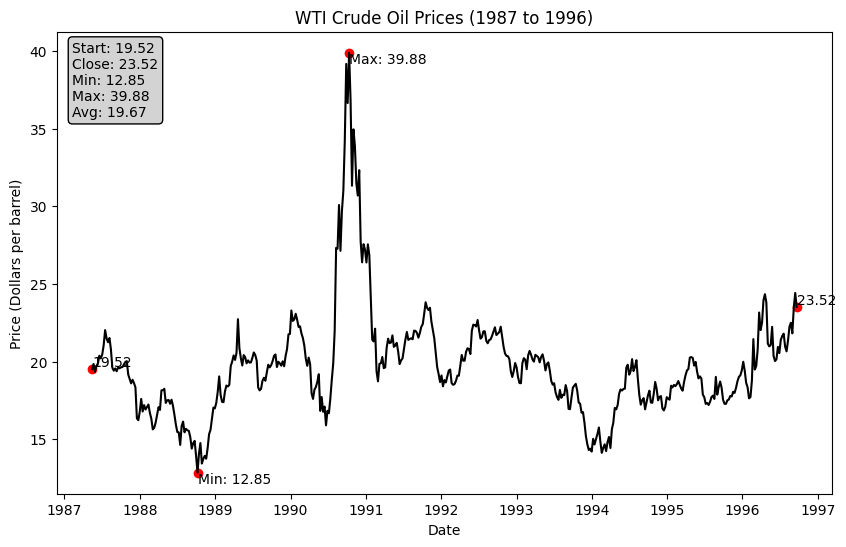

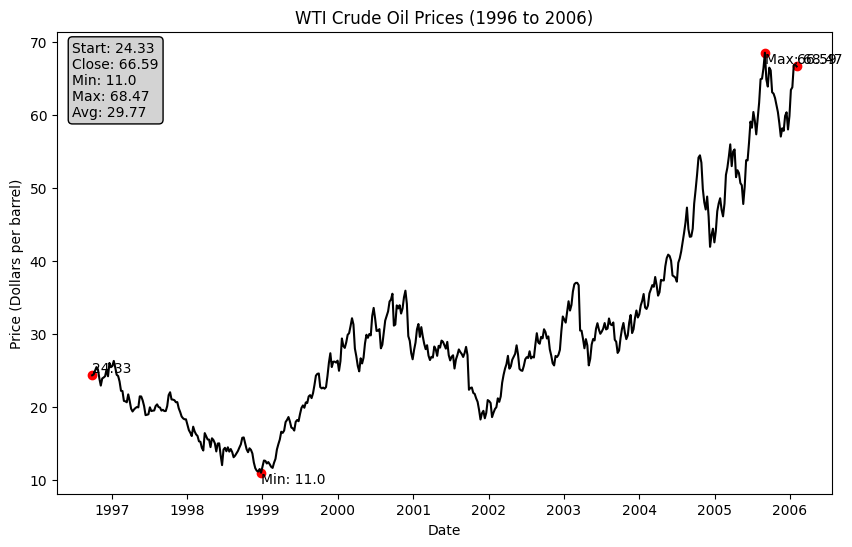

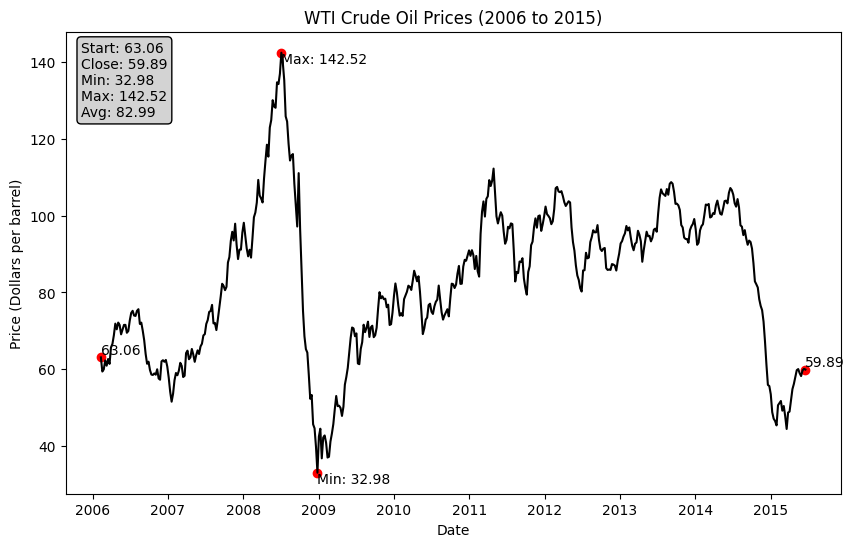

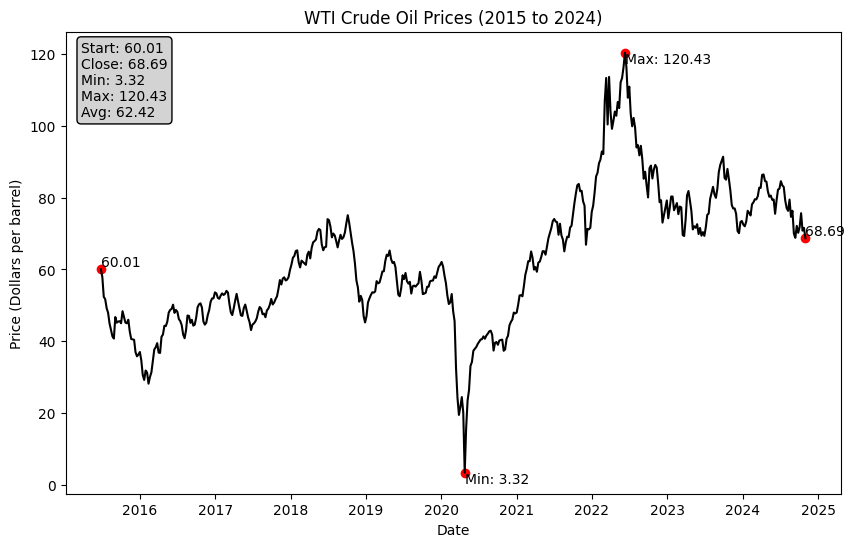

In [50]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime and sort by date for WTI data
comparison_df['date'] = pd.to_datetime(comparison_df['date'], format='%Y-%m-%d')
comparison_df = comparison_df.sort_values(by='date')

# Filter for WTI data only
df_WTI = comparison_df[['date', 'price per barrel WTI']].rename(columns={'price per barrel WTI': 'price'})

# Divide the dataset into 4 equal parts
chunks_WTI = np.array_split(df_WTI, 4)

# Plot each chunk in a separate Matplotlib plot
for i, chunk in enumerate(chunks_WTI):
    # Calculate key points
    min_price = chunk['price'].min()
    max_price = chunk['price'].max()
    start_price = chunk['price'].iloc[0]
    end_price = chunk['price'].iloc[-1]
    avg_price = chunk['price'].mean()

    min_date = chunk[chunk['price'] == min_price]['date'].values[0]
    max_date = chunk[chunk['price'] == max_price]['date'].values[0]
    start_date = chunk['date'].iloc[0]
    end_date = chunk['date'].iloc[-1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(chunk['date'], chunk['price'], color='black', label='Price')

    # Highlight the points (min, max, start, end)
    plt.scatter([start_date, end_date, min_date, max_date],
                [start_price, end_price, min_price, max_price],
                color='red')
    plt.text(start_date, start_price, f'{start_price}', verticalalignment='bottom')
    plt.text(end_date, end_price, f'{end_price}', verticalalignment='bottom')
    plt.text(min_date, min_price, f'Min: {min_price}', verticalalignment='top')
    plt.text(max_date, max_price, f'Max: {max_price}', verticalalignment='top')

    # Add annotation box with start, close, min, max, and average
    annotation_text = f"Start: {start_price}\nClose: {end_price}\nMin: {min_price}\nMax: {max_price}\nAvg: {avg_price:.2f}"
    plt.annotate(annotation_text, xy=(0.02, 0.98), xycoords="axes fraction", ha="left", va="top",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    # Set titles and labels
    plt.title(f"WTI Crude Oil Prices ({start_date.year} to {end_date.year})")
    plt.xlabel('Date')
    plt.ylabel('Price (Dollars per barrel)')

    # Save the plot as a PNG image
    plt.savefig(f"WTI_Crude_Oil_Prices_{start_date.year}_to_{end_date.year}.png")

    # Display the plot
    plt.show()


**TREND GRAPH FOR BRENT**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



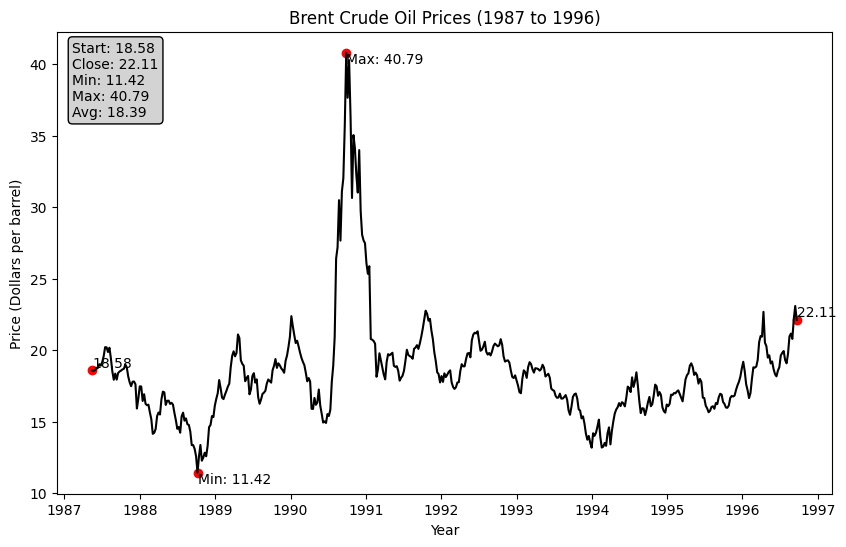

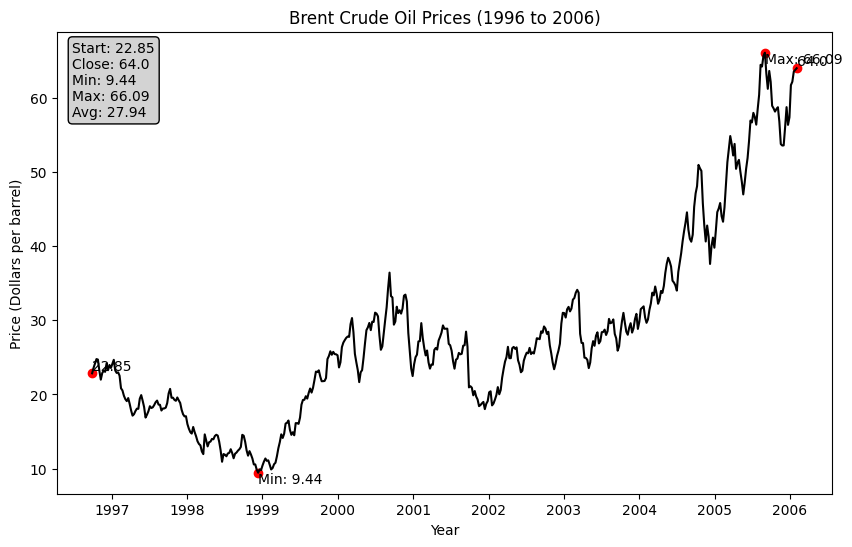

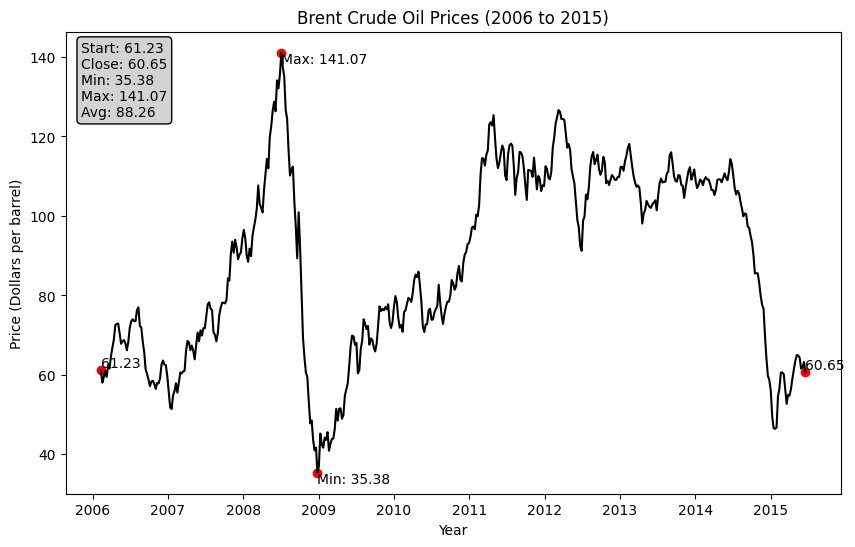

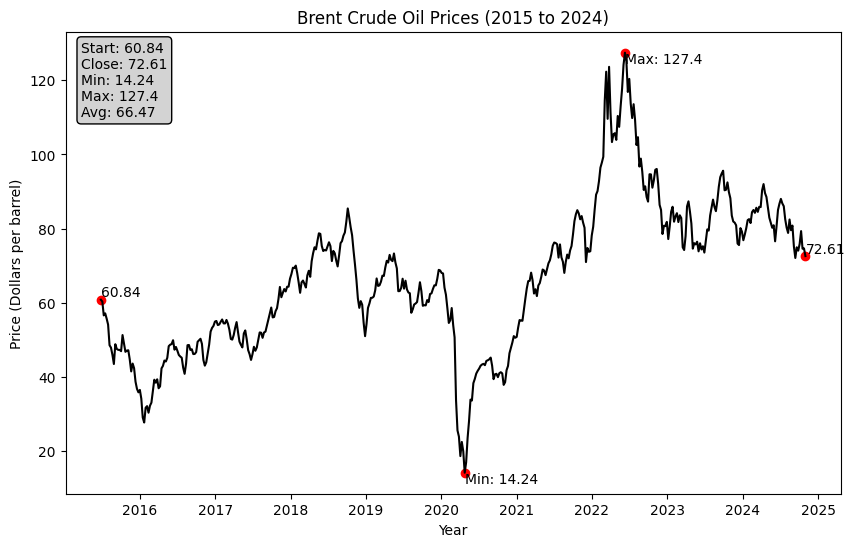

In [52]:
import matplotlib.pyplot as plt

# Filter for Brent data only
df_BRENT = comparison_df[['date', 'price per barrel BRENT']].rename(columns={'price per barrel BRENT': 'price'})

# Divide the dataset into 4 equal parts
chunks_BRENT = np.array_split(df_BRENT, 4)

# Plot each chunk in a separate Matplotlib plot
for i, chunk in enumerate(chunks_BRENT):
    # Calculate key points
    min_price = chunk['price'].min()
    max_price = chunk['price'].max()
    start_price = chunk['price'].iloc[0]
    end_price = chunk['price'].iloc[-1]
    avg_price = chunk['price'].mean()

    min_date = chunk[chunk['price'] == min_price]['date'].values[0]
    max_date = chunk[chunk['price'] == max_price]['date'].values[0]
    start_date = chunk['date'].iloc[0]
    end_date = chunk['date'].iloc[-1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(chunk['date'], chunk['price'], color='black', label='Price')

    # Highlight the points (min, max, start, end)
    plt.scatter([start_date, end_date, min_date, max_date],
                [start_price, end_price, min_price, max_price],
                color='red')
    plt.text(start_date, start_price, f'{start_price}', verticalalignment='bottom')
    plt.text(end_date, end_price, f'{end_price}', verticalalignment='bottom')
    plt.text(min_date, min_price, f'Min: {min_price}', verticalalignment='top')
    plt.text(max_date, max_price, f'Max: {max_price}', verticalalignment='top')

    # Add annotation box with start, close, min, max, and average
    annotation_text = f"Start: {start_price}\nClose: {end_price}\nMin: {min_price}\nMax: {max_price}\nAvg: {avg_price:.2f}"
    plt.annotate(annotation_text, xy=(0.02, 0.98), xycoords="axes fraction", ha="left", va="top",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    # Set titles and labels
    plt.title(f"Brent Crude Oil Prices ({start_date.year} to {end_date.year})")
    plt.xlabel('Year')  # Updated label
    plt.ylabel('Price (Dollars per barrel)')

    # Save the plot as a PNG image
    plt.savefig(f"Brent_Crude_Oil_Prices_{start_date.year}_to_{end_date.year}.png")

    # Display the plot
    plt.show()


**Comparative Analysis of WTI and Brent Prices with Key Highlights**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



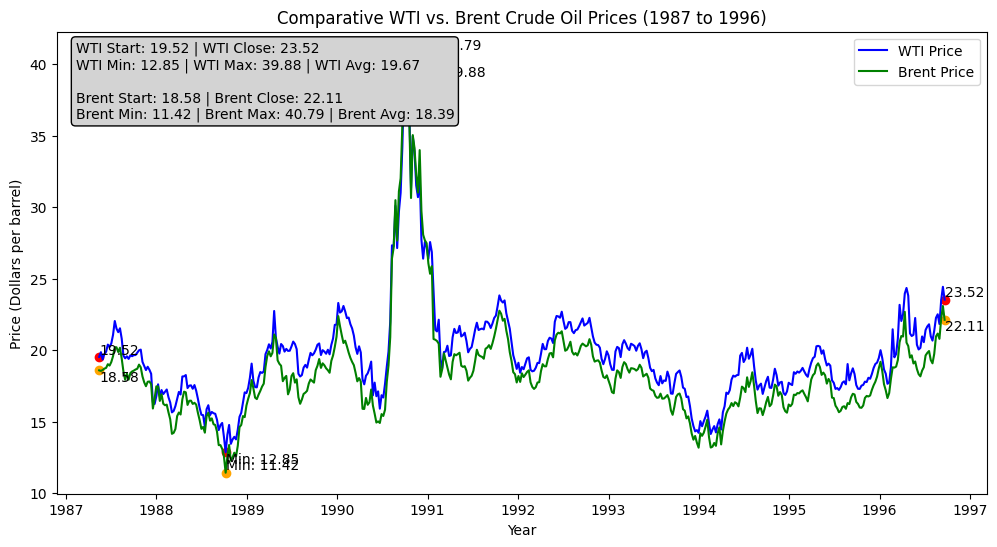

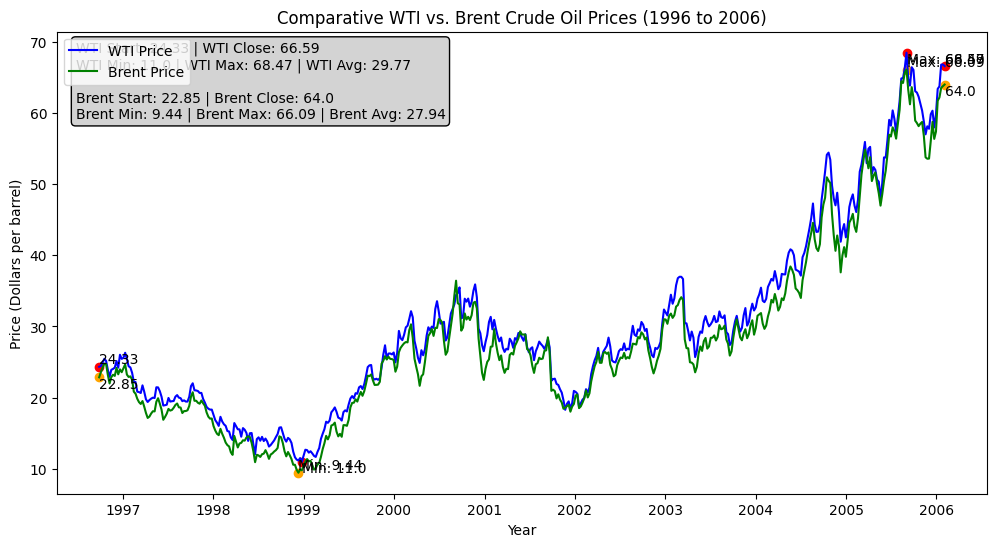

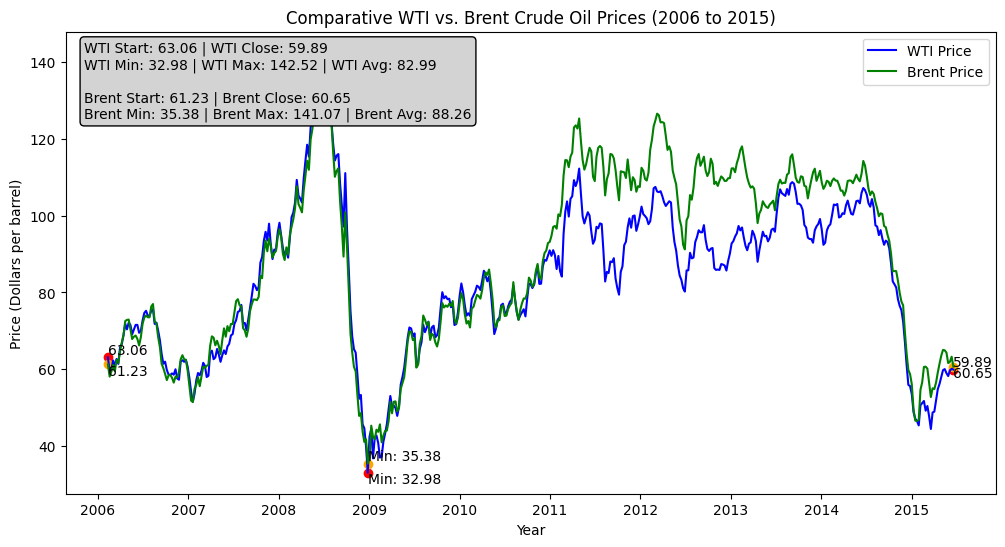

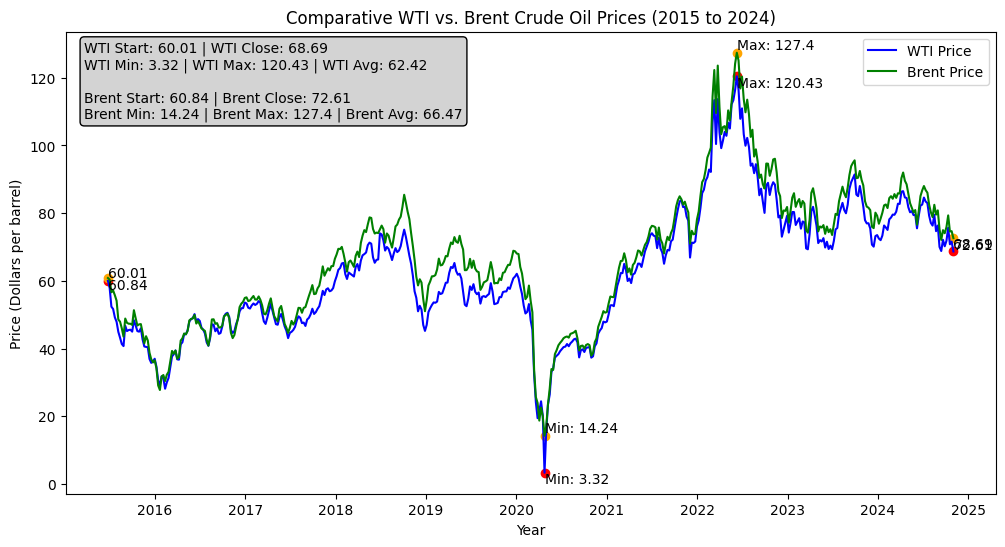

In [53]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime and sort by date
comparison_df['date'] = pd.to_datetime(comparison_df['date'], format='%Y-%m-%d')
comparison_df = comparison_df.sort_values(by='date')

# Split the dataset into 4 equal chunks
chunks = np.array_split(comparison_df, 4)

# Plot each chunk in a separate Matplotlib plot
for i, chunk in enumerate(chunks):
    # Calculate key points for WTI
    min_price_WTI = chunk['price per barrel WTI'].min()
    max_price_WTI = chunk['price per barrel WTI'].max()
    start_price_WTI = chunk['price per barrel WTI'].iloc[0]
    end_price_WTI = chunk['price per barrel WTI'].iloc[-1]
    avg_price_WTI = chunk['price per barrel WTI'].mean()

    min_date_WTI = chunk[chunk['price per barrel WTI'] == min_price_WTI]['date'].values[0]
    max_date_WTI = chunk[chunk['price per barrel WTI'] == max_price_WTI]['date'].values[0]
    start_date = chunk['date'].iloc[0]
    end_date = chunk['date'].iloc[-1]

    # Calculate key points for Brent
    min_price_BRENT = chunk['price per barrel BRENT'].min()
    max_price_BRENT = chunk['price per barrel BRENT'].max()
    start_price_BRENT = chunk['price per barrel BRENT'].iloc[0]
    end_price_BRENT = chunk['price per barrel BRENT'].iloc[-1]
    avg_price_BRENT = chunk['price per barrel BRENT'].mean()

    min_date_BRENT = chunk[chunk['price per barrel BRENT'] == min_price_BRENT]['date'].values[0]
    max_date_BRENT = chunk[chunk['price per barrel BRENT'] == max_price_BRENT]['date'].values[0]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot WTI price line
    plt.plot(chunk['date'], chunk['price per barrel WTI'], color='blue', label='WTI Price')

    # Plot Brent price line
    plt.plot(chunk['date'], chunk['price per barrel BRENT'], color='green', label='Brent Price')

    # Highlight points for WTI (min, max, start, end)
    plt.scatter([start_date, end_date, min_date_WTI, max_date_WTI],
                [start_price_WTI, end_price_WTI, min_price_WTI, max_price_WTI],
                color='red')
    plt.text(start_date, start_price_WTI, f'{start_price_WTI}', verticalalignment='bottom')
    plt.text(end_date, end_price_WTI, f'{end_price_WTI}', verticalalignment='bottom')
    plt.text(min_date_WTI, min_price_WTI, f'Min: {min_price_WTI}', verticalalignment='top')
    plt.text(max_date_WTI, max_price_WTI, f'Max: {max_price_WTI}', verticalalignment='top')

    # Highlight points for Brent (min, max, start, end)
    plt.scatter([start_date, end_date, min_date_BRENT, max_date_BRENT],
                [start_price_BRENT, end_price_BRENT, min_price_BRENT, max_price_BRENT],
                color='orange')
    plt.text(start_date, start_price_BRENT, f'{start_price_BRENT}', verticalalignment='top')
    plt.text(end_date, end_price_BRENT, f'{end_price_BRENT}', verticalalignment='top')
    plt.text(min_date_BRENT, min_price_BRENT, f'Min: {min_price_BRENT}', verticalalignment='bottom')
    plt.text(max_date_BRENT, max_price_BRENT, f'Max: {max_price_BRENT}', verticalalignment='bottom')

    # Add annotation box
    annotation_text = f"WTI Start: {start_price_WTI} | WTI Close: {end_price_WTI}\n" \
                      f"WTI Min: {min_price_WTI} | WTI Max: {max_price_WTI} | WTI Avg: {avg_price_WTI:.2f}\n\n" \
                      f"Brent Start: {start_price_BRENT} | Brent Close: {end_price_BRENT}\n" \
                      f"Brent Min: {min_price_BRENT} | Brent Max: {max_price_BRENT} | Brent Avg: {avg_price_BRENT:.2f}"
    plt.annotate(annotation_text, xy=(0.02, 0.98), xycoords="axes fraction", ha="left", va="top",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    # Set plot title and labels
    plt.title(f"Comparative WTI vs. Brent Crude Oil Prices ({start_date.year} to {end_date.year})")
    plt.xlabel("Year")  # Updated label
    plt.ylabel("Price (Dollars per barrel)")
    plt.legend()

    # Save the plot as a PNG image
    plt.savefig(f"WTI_vs_Brent_Crude_Oil_Prices_{start_date.year}_to_{end_date.year}.png")

    # Display the plot
    plt.show()


**Comparative Histogram of WTI and Brent Crude Oil Prices**

In [40]:
# Convert 'price per barrel WTI' and 'price per barrel BRENT' to numeric (if not already done)
comparison_df['price per barrel WTI'] = pd.to_numeric(comparison_df['price per barrel WTI'], errors='coerce')
comparison_df['price per barrel BRENT'] = pd.to_numeric(comparison_df['price per barrel BRENT'], errors='coerce')

# Create a histogram trace for WTI prices
hist_WTI = go.Histogram(
    x=comparison_df['price per barrel WTI'],
    name='WTI Price',
    opacity=0.6,
    marker=dict(color='blue'),
    nbinsx=30  # Adjust bin count as needed for clarity
)

# Create a histogram trace for Brent prices
hist_BRENT = go.Histogram(
    x=comparison_df['price per barrel BRENT'],
    name='Brent Price',
    opacity=0.6,
    marker=dict(color='green'),
    nbinsx=30  # Same bin count to ensure comparability
)

# Combine the two histograms in a single figure
fig = go.Figure(data=[hist_WTI, hist_BRENT])

# Update layout for clarity
fig.update_layout(
    title='Comparative Histogram of WTI vs. Brent Crude Oil Prices',
    xaxis_title='Price (Dollars per barrel)',
    yaxis_title='Frequency',
    barmode='overlay',  # Overlay bars to compare distributions
    bargap=0.1  # Adjust gap between bars for better readability
)

# Show the plot
fig.show()


**4-Week Rolling Average and Rolling Standard Deviation for WTI and Brent**

In [41]:
# Ensure 'date' column is in datetime format
comparison_df['date'] = pd.to_datetime(comparison_df['date'])

# Calculate rolling averages and standard deviations separately
WTI_rolling_df = pd.DataFrame({
    'date': comparison_df['date'],
    'price per barrel WTI': comparison_df['price per barrel WTI'],
    'WTI_4wk_avg': comparison_df['price per barrel WTI'].rolling(window=4).mean(),
    'WTI_4wk_std': comparison_df['price per barrel WTI'].rolling(window=4).std()
})

Brent_rolling_df = pd.DataFrame({
    'date': comparison_df['date'],
    'price per barrel BRENT': comparison_df['price per barrel BRENT'],
    'Brent_4wk_avg': comparison_df['price per barrel BRENT'].rolling(window=4).mean(),
    'Brent_4wk_std': comparison_df['price per barrel BRENT'].rolling(window=4).std()
})

# Plotting for WTI
fig_WTI = go.Figure()

# Add WTI price line in dark blue
fig_WTI.add_trace(go.Scatter(
    x=WTI_rolling_df['date'], y=WTI_rolling_df['price per barrel WTI'],
    mode='lines', name='WTI Weekly Price', line=dict(color='darkblue')
))

# Add WTI 4-week rolling average line in bright red
fig_WTI.add_trace(go.Scatter(
    x=WTI_rolling_df['date'], y=WTI_rolling_df['WTI_4wk_avg'],
    mode='lines', name='WTI 4-Week Rolling Average', line=dict(color='red')
))

# Add WTI rolling standard deviation as shaded area in light gray
fig_WTI.add_trace(go.Scatter(
    x=WTI_rolling_df['date'],
    y=WTI_rolling_df['WTI_4wk_avg'] + WTI_rolling_df['WTI_4wk_std'],
    mode='lines', name='WTI Rolling Std Dev Upper Bound', line=dict(color='lightgray', width=0),
    fill=None, showlegend=False
))
fig_WTI.add_trace(go.Scatter(
    x=WTI_rolling_df['date'],
    y=WTI_rolling_df['WTI_4wk_avg'] - WTI_rolling_df['WTI_4wk_std'],
    mode='lines', name='WTI Rolling Std Dev Lower Bound', line=dict(color='lightgray', width=0),
    fill='tonexty', fillcolor='rgba(169,169,169,0.3)', showlegend=True
))

fig_WTI.update_layout(
    title='WTI Weekly Price with 4-Week Rolling Average and Standard Deviation',
    xaxis_title='Date',
    yaxis_title='Price per Barrel',
    xaxis_rangeslider_visible=True
)
fig_WTI.show()

# Plotting for Brent
fig_Brent = go.Figure()

# Add Brent price line in dark green
fig_Brent.add_trace(go.Scatter(
    x=Brent_rolling_df['date'], y=Brent_rolling_df['price per barrel BRENT'],
    mode='lines', name='Brent Weekly Price', line=dict(color='darkgreen')
))

# Add Brent 4-week rolling average line in orange
fig_Brent.add_trace(go.Scatter(
    x=Brent_rolling_df['date'], y=Brent_rolling_df['Brent_4wk_avg'],
    mode='lines', name='Brent 4-Week Rolling Average', line=dict(color='orange')
))

# Add Brent rolling standard deviation as shaded area in light gray
fig_Brent.add_trace(go.Scatter(
    x=Brent_rolling_df['date'],
    y=Brent_rolling_df['Brent_4wk_avg'] + Brent_rolling_df['Brent_4wk_std'],
    mode='lines', name='Brent Rolling Std Dev Upper Bound', line=dict(color='lightgray', width=0),
    fill=None, showlegend=False
))
fig_Brent.add_trace(go.Scatter(
    x=Brent_rolling_df['date'],
    y=Brent_rolling_df['Brent_4wk_avg'] - Brent_rolling_df['Brent_4wk_std'],
    mode='lines', name='Brent Rolling Std Dev Lower Bound', line=dict(color='lightgray', width=0),
    fill='tonexty', fillcolor='rgba(169,169,169,0.3)', showlegend=True
))

fig_Brent.update_layout(
    title='Brent Weekly Price with 4-Week Rolling Average and Standard Deviation',
    xaxis_title='Date',
    yaxis_title='Price per Barrel',
    xaxis_rangeslider_visible=True
)
fig_Brent.show()


**WTI Weekly Percentage Change**

In [42]:
# Calculate weekly percentage change for WTI
comparison_df['WTI_pct_change'] = comparison_df['price per barrel WTI'].pct_change() * 100

# Drop any NaN values created by pct_change()
df_WTI = comparison_df[['date', 'WTI_pct_change']].dropna()

# Divide the dataset into 4 equal parts
chunks_WTI = np.array_split(df_WTI, 4)

# Plot each chunk separately
for i, chunk in enumerate(chunks_WTI):
    # Create the figure
    fig = go.Figure()

    # Separate positive and negative changes
    positive_changes = chunk[chunk['WTI_pct_change'] >= 0]
    negative_changes = chunk[chunk['WTI_pct_change'] < 0]

    # Plot positive changes in green
    fig.add_trace(go.Scatter(
        x=positive_changes['date'],
        y=positive_changes['WTI_pct_change'],
        mode='lines',
        name='WTI % Change (Positive)',
        line=dict(color='green'),
        hovertemplate='Date: %{x}<br>WTI % Change: %{y:.2f}%<extra></extra>'
    ))

    # Plot negative changes in red
    fig.add_trace(go.Scatter(
        x=negative_changes['date'],
        y=negative_changes['WTI_pct_change'],
        mode='lines',
        name='WTI % Change (Negative)',
        line=dict(color='red'),
        hovertemplate='Date: %{x}<br>WTI % Change: %{y:.2f}%<extra></extra>'
    ))

    # Calculate statistics for annotation
    max_change = chunk['WTI_pct_change'].max()
    min_change = chunk['WTI_pct_change'].min()
    avg_change = chunk['WTI_pct_change'].mean()
    mean_absolute_change = chunk['WTI_pct_change'].abs().mean()  # Mean Absolute Percentage Change

    # Add annotation box with max, min, average, and mean absolute percentage changes
    annotation_text = f"<b>Max % Change:</b> {max_change:.2f}%<br>" \
                      f"<b>Min % Change:</b> {min_change:.2f}%<br>" \
                      f"<b>Avg % Change:</b> {avg_change:.2f}%<br>" \
                      f"<b>MAPC:</b> {mean_absolute_change:.2f}%"

    fig.add_annotation(text=annotation_text,
                       xref="paper", yref="paper",
                       x=0.02, y=0.98, showarrow=False,
                       bordercolor="black", borderwidth=1, borderpad=4,
                       bgcolor="lightgray", opacity=0.8,
                       font=dict(size=12))

    # Update layout with title and labels
    fig.update_layout(
        title=f"WTI Weekly Percentage Change (Part {i+1})",
        xaxis_title="Date",
        yaxis_title="Percentage Change (%)",
        xaxis_rangeslider_visible=True
    )

    # Show the plot
    fig.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



**Brent Weekly Percentage Change**

In [43]:
# Calculate weekly percentage change for Brent
comparison_df['Brent_pct_change'] = comparison_df['price per barrel BRENT'].pct_change() * 100

# Drop any NaN values created by pct_change()
df_Brent = comparison_df[['date', 'Brent_pct_change']].dropna()

# Divide the dataset into 4 equal parts
chunks_Brent = np.array_split(df_Brent, 4)

# Plot each chunk separately
for i, chunk in enumerate(chunks_Brent):
    # Create the figure
    fig = go.Figure()

    # Separate positive and negative changes
    positive_changes = chunk[chunk['Brent_pct_change'] >= 0]
    negative_changes = chunk[chunk['Brent_pct_change'] < 0]

    # Plot positive changes in green
    fig.add_trace(go.Scatter(
        x=positive_changes['date'],
        y=positive_changes['Brent_pct_change'],
        mode='lines',
        name='Brent % Change (Positive)',
        line=dict(color='green'),
        hovertemplate='Date: %{x}<br>Brent % Change: %{y:.2f}%<extra></extra>'
    ))

    # Plot negative changes in red
    fig.add_trace(go.Scatter(
        x=negative_changes['date'],
        y=negative_changes['Brent_pct_change'],
        mode='lines',
        name='Brent % Change (Negative)',
        line=dict(color='red'),
        hovertemplate='Date: %{x}<br>Brent % Change: %{y:.2f}%<extra></extra>'
    ))

    # Calculate statistics for annotation
    max_change = chunk['Brent_pct_change'].max()
    min_change = chunk['Brent_pct_change'].min()
    avg_change = chunk['Brent_pct_change'].mean()
    mean_absolute_change = chunk['Brent_pct_change'].abs().mean()  # Mean Absolute Percentage Change

    # Add annotation box with max, min, average, and mean absolute percentage changes
    annotation_text = f"<b>Max % Change:</b> {max_change:.2f}%<br>" \
                      f"<b>Min % Change:</b> {min_change:.2f}%<br>" \
                      f"<b>Avg % Change:</b> {avg_change:.2f}%<br>" \
                      f"<b>MAPC:</b> {mean_absolute_change:.2f}%"

    fig.add_annotation(text=annotation_text,
                       xref="paper", yref="paper",
                       x=0.02, y=0.98, showarrow=False,
                       bordercolor="black", borderwidth=1, borderpad=4,
                       bgcolor="lightgray", opacity=0.8,
                       font=dict(size=12))

    # Update layout with title and labels
    fig.update_layout(
        title=f"Brent Weekly Percentage Change (Part {i+1})",
        xaxis_title="Date",
        yaxis_title="Percentage Change (%)",
        xaxis_rangeslider_visible=True
    )

    # Show the plot
    fig.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



**Seasonal Decomposition with Annual Frequency for WTI and Brent**

In [44]:
# Assuming df_WTI_new and df_BRENT_new have been created correctly and contain 'date' and 'price per barrel' columns.

# Step 1: Create DataFrames for decomposition
# Set the 'date' column as the index for both WTI and Brent
df_WTI_new.set_index('date', inplace=True)
df_BRENT_new.set_index('date', inplace=True)

# Step 2: Ensure there are no missing values and sufficient data
if df_WTI_new['price per barrel'].isnull().any() or df_BRENT_new['price per barrel'].isnull().any():
    raise ValueError("Data contains missing values, please clean the data before decomposition.")

# Check for sufficient data points
if df_WTI_new['price per barrel'].shape[0] < 104 or df_BRENT_new['price per barrel'].shape[0] < 104:
    raise ValueError("Not enough data points for seasonal decomposition.")

# Step 3: Perform seasonal decomposition
decomposition_WTI = seasonal_decompose(df_WTI_new['price per barrel'], model='additive', period=52)
decomposition_BRENT = seasonal_decompose(df_BRENT_new['price per barrel'], model='additive', period=52)

# Step 4: Plot decomposition results for WTI
fig_WTI = go.Figure()
fig_WTI.add_trace(go.Scatter(x=decomposition_WTI.observed.index, y=decomposition_WTI.observed,
                              mode='lines', name='Observed', line=dict(color='blue')))
fig_WTI.add_trace(go.Scatter(x=decomposition_WTI.trend.index, y=decomposition_WTI.trend,
                              mode='lines', name='Trend', line=dict(color='orange')))
fig_WTI.add_trace(go.Scatter(x=decomposition_WTI.seasonal.index, y=decomposition_WTI.seasonal,
                              mode='lines', name='Seasonal', line=dict(color='green')))
fig_WTI.add_trace(go.Scatter(x=decomposition_WTI.resid.index, y=decomposition_WTI.resid,
                              mode='lines', name='Residual', line=dict(color='red')))
fig_WTI.update_layout(title='Seasonal Decomposition of WTI Prices',
                      xaxis_title='Date',
                      yaxis_title='Price per Barrel',
                      xaxis_rangeslider_visible=True)

# Show WTI decomposition plot
fig_WTI.show()

# Step 5: Plot decomposition results for Brent
fig_BRENT = go.Figure()
fig_BRENT.add_trace(go.Scatter(x=decomposition_BRENT.observed.index, y=decomposition_BRENT.observed,
                                mode='lines', name='Observed', line=dict(color='blue')))
fig_BRENT.add_trace(go.Scatter(x=decomposition_BRENT.trend.index, y=decomposition_BRENT.trend,
                                mode='lines', name='Trend', line=dict(color='orange')))
fig_BRENT.add_trace(go.Scatter(x=decomposition_BRENT.seasonal.index, y=decomposition_BRENT.seasonal,
                                mode='lines', name='Seasonal', line=dict(color='green')))
fig_BRENT.add_trace(go.Scatter(x=decomposition_BRENT.resid.index, y=decomposition_BRENT.resid,
                                mode='lines', name='Residual', line=dict(color='red')))
fig_BRENT.update_layout(title='Seasonal Decomposition of Brent Prices',
                        xaxis_title='Date',
                        yaxis_title='Price per Barrel',
                        xaxis_rangeslider_visible=True)

# Show Brent decomposition plot
fig_BRENT.show()


**Seasonal Decomposition with Seasonal Categories**

In [45]:
import pandas as pd
import plotly.graph_objs as go

# Assuming comparison_df has already been created
comparison_df['date'] = pd.to_datetime(comparison_df['date'])

# Step 1: Create a new DataFrame with season categorization
comparison_df['season'] = 'Winter'  # Default to Winter
comparison_df.loc[(comparison_df['date'].dt.month >= 3) & (comparison_df['date'].dt.month <= 5), 'season'] = 'Spring'
comparison_df.loc[(comparison_df['date'].dt.month >= 6) & (comparison_df['date'].dt.month <= 8), 'season'] = 'Summer'
comparison_df.loc[(comparison_df['date'].dt.month >= 9) & (comparison_df['date'].dt.month <= 11), 'season'] = 'Fall'

# Step 2: Calculate average prices for each season
seasonal_avg = comparison_df.groupby('season').agg({
    'price per barrel WTI': 'mean',
    'price per barrel BRENT': 'mean'
}).reset_index()

# Step 3: Create a Plotly bar graph to visualize the average prices per season
fig = go.Figure()

fig.add_trace(go.Bar(
    x=seasonal_avg['season'],
    y=seasonal_avg['price per barrel WTI'],
    name='Average WTI Price',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=seasonal_avg['season'],
    y=seasonal_avg['price per barrel BRENT'],
    name='Average Brent Price',
    marker_color='green'
))

# Step 4: Update layout for better visualization
fig.update_layout(
    title='Average WTI and Brent Prices by Season',
    xaxis_title='Season',
    yaxis_title='Average Price (Dollars per Barrel)',
    barmode='group'
)

fig.show()


**Calculating Percentage Intervals for WTI**

In [46]:
# Assuming 'comparison_df' already contains 'WTI_pct_change' column for WTI weekly percentage changes
# Drop any NaN values in 'WTI_pct_change' for accuracy
df_WTI = comparison_df[['date', 'WTI_pct_change']].dropna()

# Total number of data points
total_weeks = len(df_WTI)

# Calculate percentages for each interval
percent_within_2 = len(df_WTI[(df_WTI['WTI_pct_change'] >= -2) & (df_WTI['WTI_pct_change'] <= 2)]) / total_weeks * 100
percent_within_5 = len(df_WTI[(df_WTI['WTI_pct_change'] >= -5) & (df_WTI['WTI_pct_change'] <= 5)]) / total_weeks * 100
percent_above_5 = len(df_WTI[df_WTI['WTI_pct_change'] > 5]) / total_weeks * 100
percent_below_5 = len(df_WTI[df_WTI['WTI_pct_change'] < -5]) / total_weeks * 100
percent_above_10 = len(df_WTI[df_WTI['WTI_pct_change'] > 10]) / total_weeks * 100
percent_below_10 = len(df_WTI[df_WTI['WTI_pct_change'] < -10]) / total_weeks * 100

# Display results
print("WTI Percentage Intervals:")
print(f"Percentage of weeks within ±2% change: {percent_within_2:.2f}%")
print(f"Percentage of weeks within ±5% change: {percent_within_5:.2f}%")
print(f"Percentage of weeks with > 5% increase: {percent_above_5:.2f}%")
print(f"Percentage of weeks with < -5% decrease: {percent_below_5:.2f}%")
print(f"Percentage of weeks with > 10% increase: {percent_above_10:.2f}%")
print(f"Percentage of weeks with < -10% decrease: {percent_below_10:.2f}%")


WTI Percentage Intervals:
Percentage of weeks within ±2% change: 42.15%
Percentage of weeks within ±5% change: 81.64%
Percentage of weeks with > 5% increase: 9.31%
Percentage of weeks with < -5% decrease: 9.05%
Percentage of weeks with > 10% increase: 1.64%
Percentage of weeks with < -10% decrease: 1.69%


**Calculating Percentage Intervals for Brent**

In [47]:
# Drop any NaN values in 'Brent_pct_change' for accuracy
df_Brent = comparison_df[['date', 'Brent_pct_change']].dropna()

# Total number of data points
total_weeks = len(df_Brent)

# Calculate percentages for each interval
percent_within_2 = len(df_Brent[(df_Brent['Brent_pct_change'] >= -2) & (df_Brent['Brent_pct_change'] <= 2)]) / total_weeks * 100
percent_within_5 = len(df_Brent[(df_Brent['Brent_pct_change'] >= -5) & (df_Brent['Brent_pct_change'] <= 5)]) / total_weeks * 100
percent_above_5 = len(df_Brent[df_Brent['Brent_pct_change'] > 5]) / total_weeks * 100
percent_below_5 = len(df_Brent[df_Brent['Brent_pct_change'] < -5]) / total_weeks * 100
percent_above_10 = len(df_Brent[df_Brent['Brent_pct_change'] > 10]) / total_weeks * 100
percent_below_10 = len(df_Brent[df_Brent['Brent_pct_change'] < -10]) / total_weeks * 100

# Display results
print("Brent Percentage Intervals:")
print(f"Percentage of weeks within ±2% change: {percent_within_2:.2f}%")
print(f"Percentage of weeks within ±5% change: {percent_within_5:.2f}%")
print(f"Percentage of weeks with > 5% increase: {percent_above_5:.2f}%")
print(f"Percentage of weeks with < -5% decrease: {percent_below_5:.2f}%")
print(f"Percentage of weeks with > 10% increase: {percent_above_10:.2f}%")
print(f"Percentage of weeks with < -10% decrease: {percent_below_10:.2f}%")


Brent Percentage Intervals:
Percentage of weeks within ±2% change: 42.40%
Percentage of weeks within ±5% change: 80.10%
Percentage of weeks with > 5% increase: 10.03%
Percentage of weeks with < -5% decrease: 9.87%
Percentage of weeks with > 10% increase: 1.59%
Percentage of weeks with < -10% decrease: 1.43%


**Pearson Correlation**

In [48]:
# Calculate the Pearson correlation between WTI and Brent prices
pearson_corr = comparison_df['price per barrel WTI'].corr(comparison_df['price per barrel BRENT'], method='pearson')

print("Pearson Correlation between WTI and Brent prices:", pearson_corr)


Pearson Correlation between WTI and Brent prices: 0.9915183966382904


**Spearman Correlation**

In [49]:
# Calculate the Spearman correlation between WTI and Brent prices
spearman_corr = comparison_df['price per barrel WTI'].corr(comparison_df['price per barrel BRENT'], method='spearman')

print("Spearman Correlation between WTI and Brent prices:", spearman_corr)


Spearman Correlation between WTI and Brent prices: 0.9954781032755503
